In [108]:
library(factoextra)
library(graphics)
library(ggbiplot) #package to plot principal components

## Exercise 1: Cluster Analysis (CA)

In [135]:
cities <-  read.csv("./Dataset/clean_dataset.csv",header = T)
head(cities)

,Musanze,Mombasa,Maseno,Lome,Lagos,Koulikoro,Kigali,Kayonza,Kamembe,Nairobi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.5,3.5,4.9,3.7,3.5,4.1,2.6,3.7,3.5,4.5
2,4.7,3.6,5.1,4.2,4.0,4.6,2.8,3.7,3.7,4.7
3,4.1,3.4,4.5,4.2,3.9,4.7,2.4,3.5,3.5,4.1
4,3.2,2.9,3.9,3.9,3.6,4.2,2.1,2.9,2.9,3.2
5,2.9,3.1,3.6,3.5,3.3,3.5,2.4,3.0,3.1,2.9
6,2.4,2.3,3.6,2.8,2.6,3.0,2.4,2.2,2.1,2.4


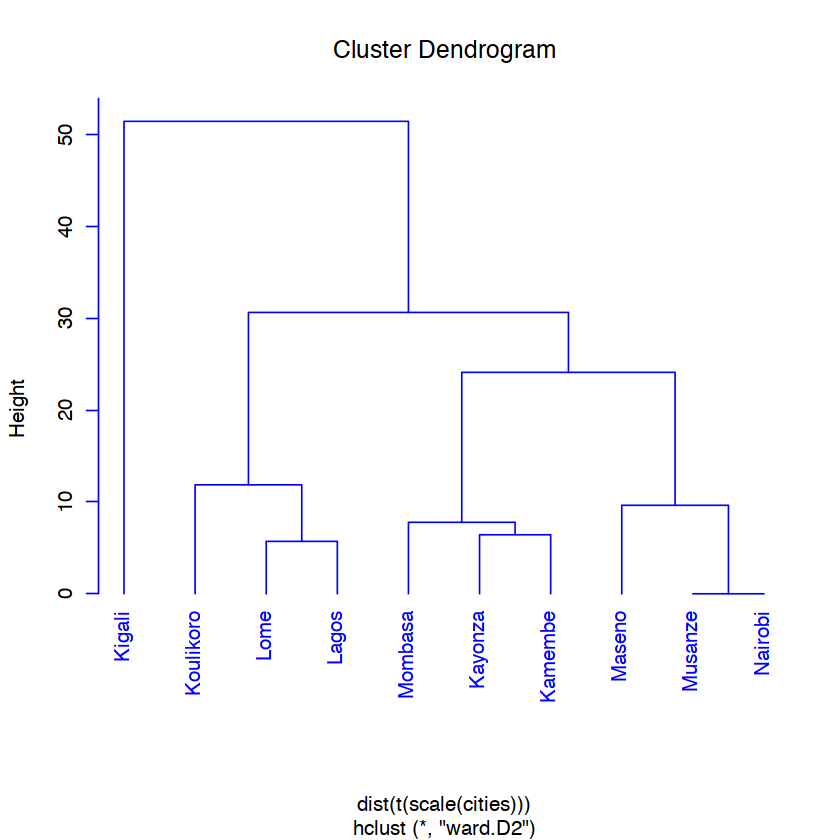

In [136]:


####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='ward.D2')

#####plotting the tree#################
plot(cities.august.scaled.clus,hang=-6,col="blue")

#cutree(yy.clus,k=4)

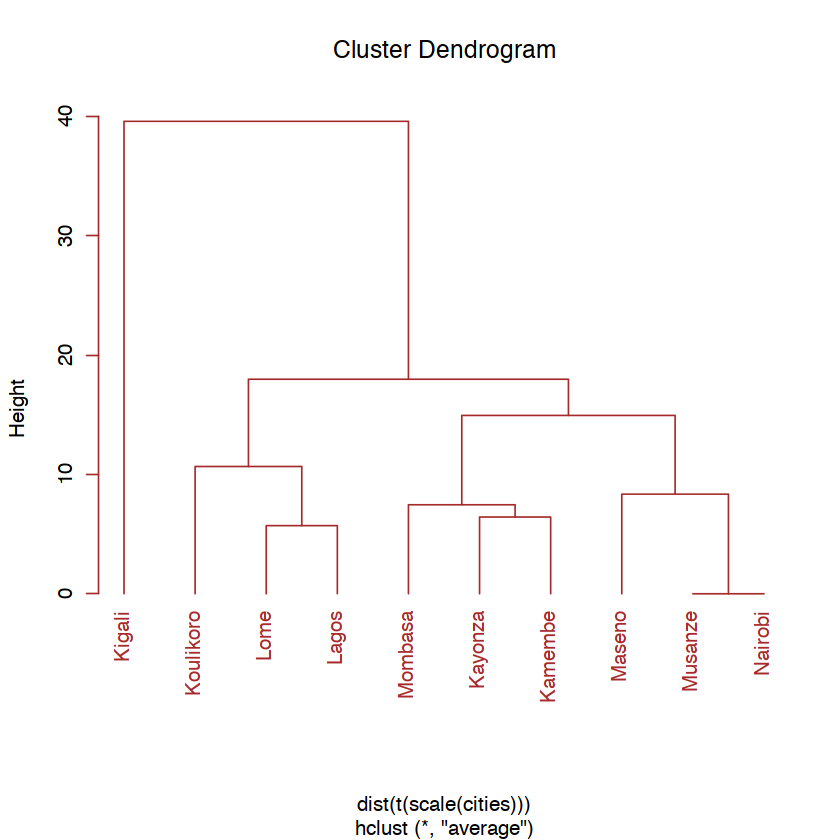

In [137]:
####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='average')

#####plotting the tree#################
plot(cities.august.scaled.clus,hang=-6,col="brown")

#cutree(yy.clus,k=4)

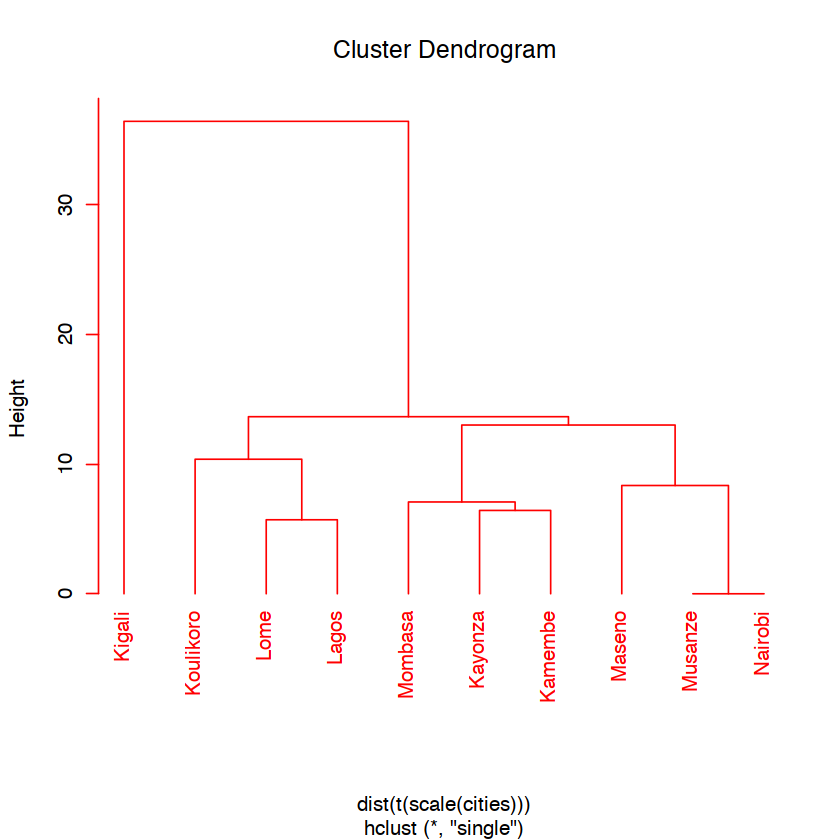

In [141]:
####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='single')

#####plotting the tree#################
plot(cities.august.scaled.clus,hang=-6,col="red")

#cutree(yy.clus,k=4)

In [142]:
# Cut tree into 4 groups
sub_grp <- cutree(cities.august.scaled.clus, k = 4)

In [143]:
fviz_cluster(list(data = cities, cluster = sub_grp))

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 612, 10


## Exercise 2: Principal Component Analysis (PCA)

In [144]:
# calculating the PCA
#, center = TRUE,scale = TRUE
cities.pca <- prcomp(cities,center = TRUE,scale = TRUE)

summary(cities.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.7527 1.2108 0.6979 0.50241 0.32046 0.22262 0.17833
Proportion of Variance 0.7578 0.1466 0.0487 0.02524 0.01027 0.00496 0.00318
Cumulative Proportion  0.7578 0.9044 0.9531 0.97830 0.98857 0.99353 0.99671
                          PC8     PC9      PC10
Standard deviation     0.1304 0.12610 1.052e-16
Proportion of Variance 0.0017 0.00159 0.000e+00
Cumulative Proportion  0.9984 1.00000 1.000e+00

In [160]:
pca  <- prcomp(cities)

In [164]:
year = data.frame(
    "year" <- c(1960:2010)
)

ERROR: Error in rownames(dcenter = TRUE, scale = TRUE): unused arguments (dcenter = TRUE, scale = TRUE)


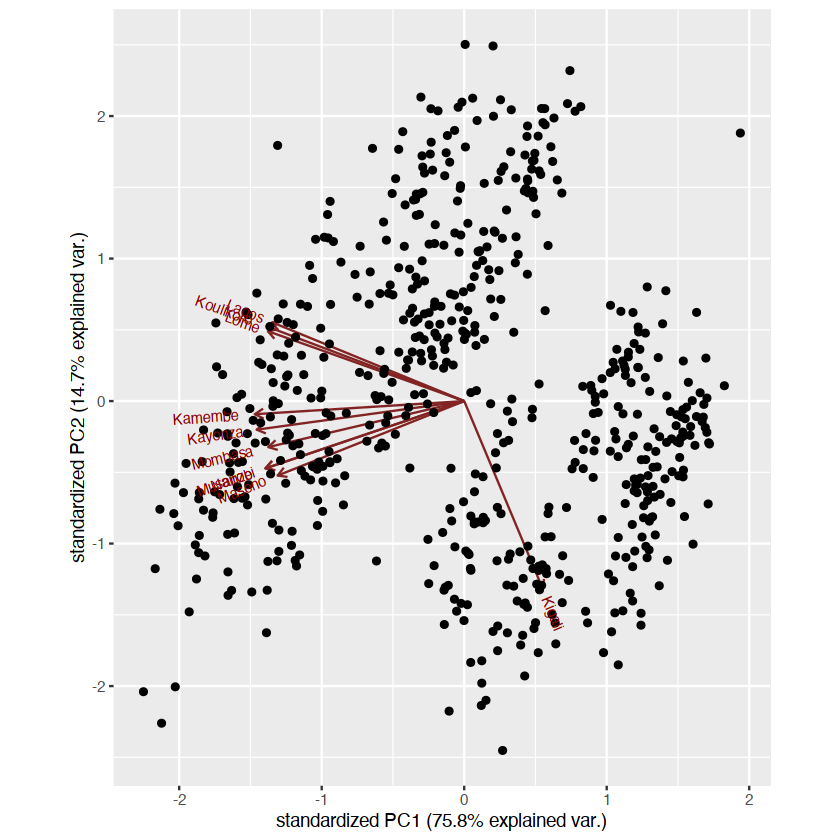

In [145]:
ggbiplot(cities.pca)
ggbiplot(cities.pca, labels=rownames(dcenter = TRUE,scale = TRUE))


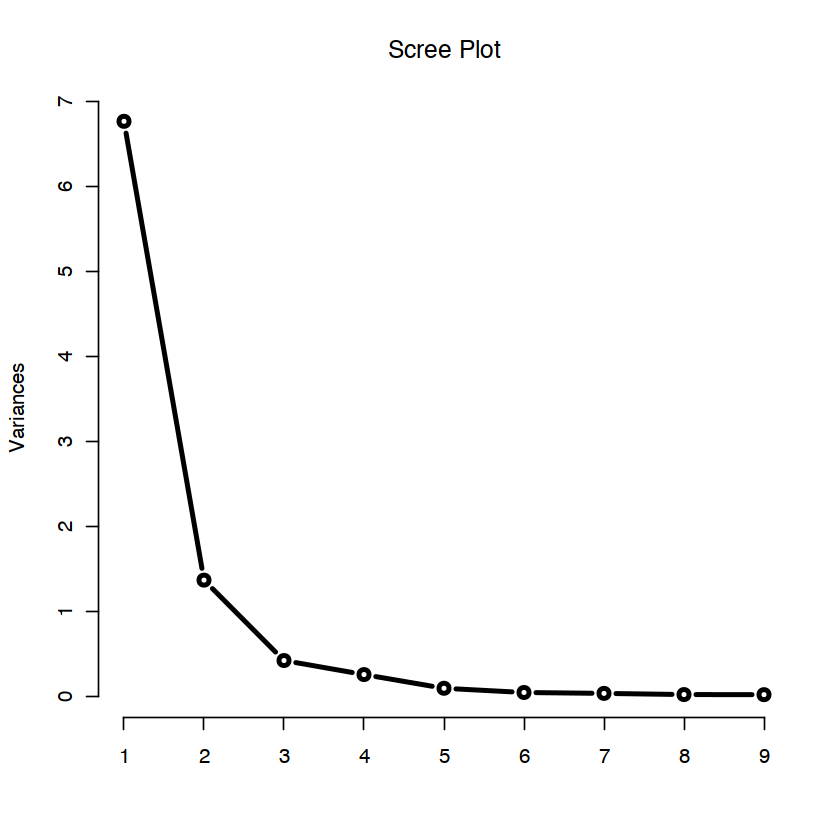

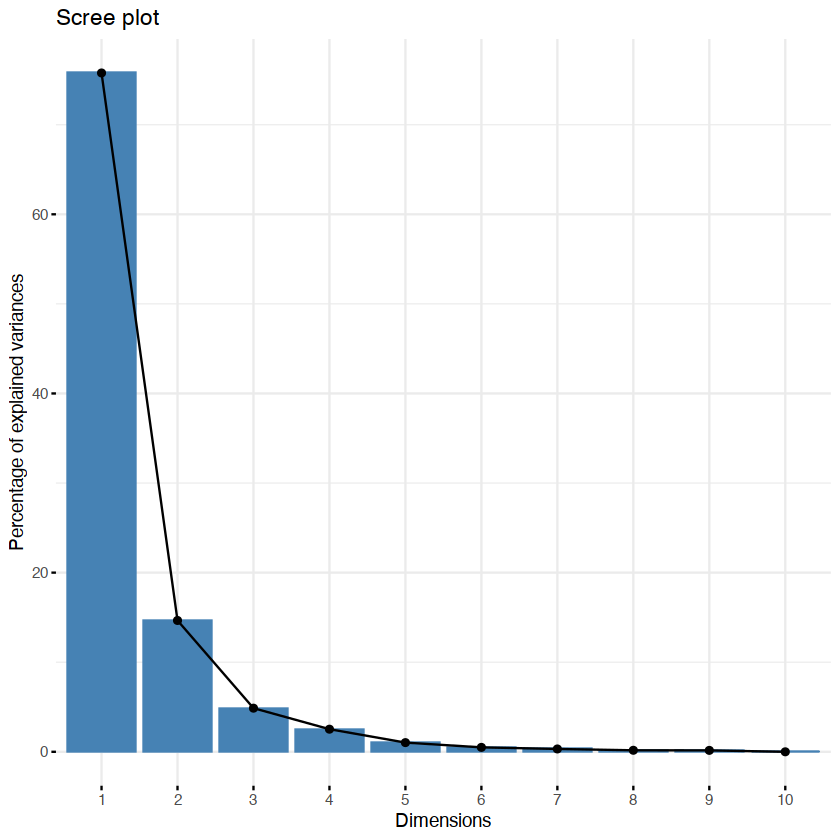

In [146]:
#Scree plot
screeplot(dakar.pca,type='l',lwd=3,main='Scree Plot')

fviz_eig(cities.pca)

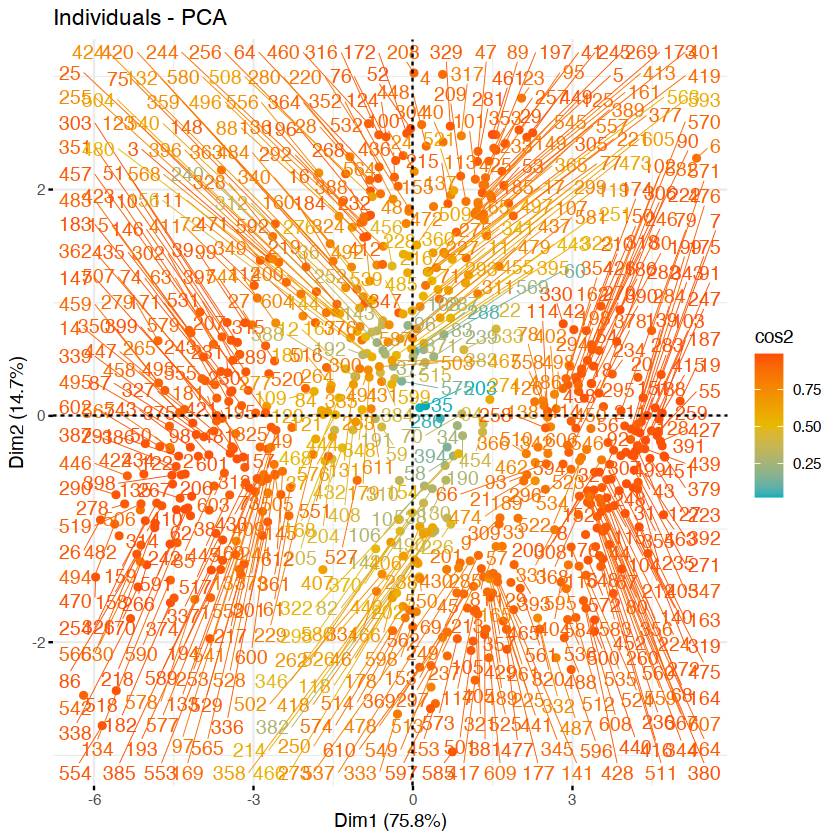

In [148]:
fviz_pca_ind(cities.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

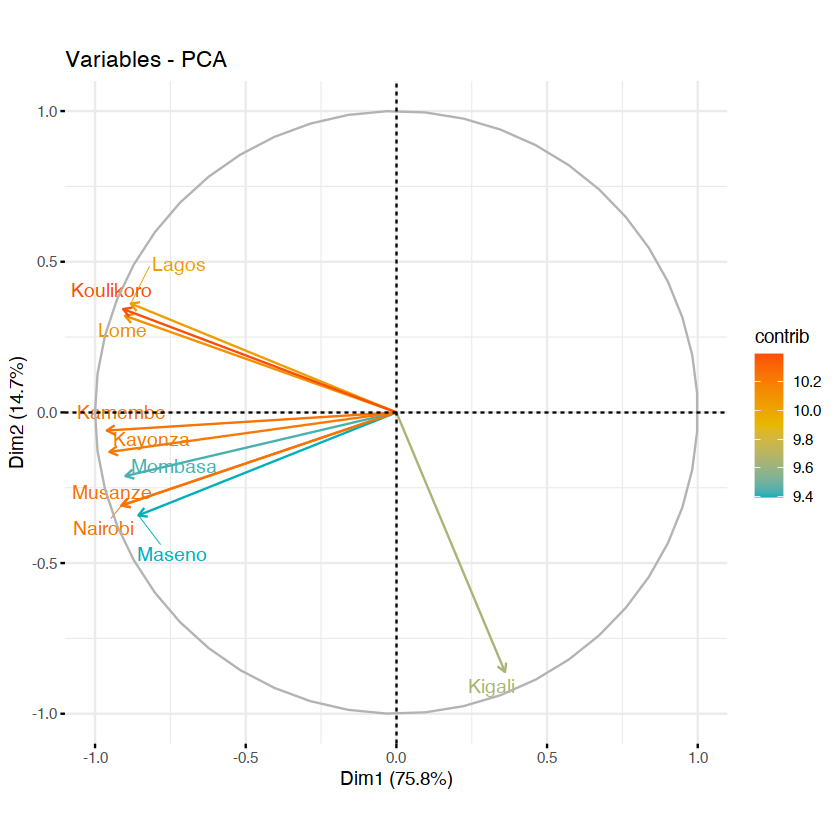

In [149]:
fviz_pca_var(cities.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

#### Access to the PCA results

In [150]:
library(factoextra)
# Eigenvalues
eig.val <- get_eigenvalue(cities.pca)
eig.val


,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,7.577546e+00,7.577546e+01,75.77546
Dim.2,1.466033e+00,1.466033e+01,90.43579
Dim.3,4.870469e-01,4.870469e+00,95.30626
Dim.4,2.524123e-01,2.524123e+00,97.83038
Dim.5,1.026978e-01,1.026978e+00,98.85736
Dim.6,4.955822e-02,4.955822e-01,99.35294
Dim.7,3.180026e-02,3.180026e-01,99.67094
Dim.8,1.700531e-02,1.700531e-01,99.84099
Dim.9,1.590053e-02,1.590053e-01,100.00000


In [151]:
# Results for Variables
res.var <- get_pca_var(cities.pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Musanze,-0.9121410,-0.3088596,0.24073249,-8.921213e-05,0.09693140,-0.06929304,-0.018444701,0.006309629,0.0086728934,7.435248e-17
Mombasa,-0.8992368,-0.2111126,-0.34808491,1.087877e-01,0.05188684,0.03820989,0.048903623,0.070715416,0.0475642120,-1.167403e-32
Maseno,-0.8560736,-0.3416859,0.33317310,-1.902416e-02,-0.14326850,0.12896639,0.043103475,-0.001113355,0.0022772163,2.042955e-32
Lome,-0.9008940,0.3206204,-0.05911081,-2.551152e-01,0.08704222,0.02161632,0.052809360,0.021887519,-0.0755196307,2.188880e-32
Lagos,-0.8815919,0.3612390,-0.07847311,-2.720699e-01,-0.02249058,0.03118884,-0.077717983,-0.019083341,0.0651097767,-7.296267e-33
Koulikoro,-0.9069107,0.3428740,-0.02445270,3.605501e-02,-0.19495103,-0.13210777,0.050564679,0.004979934,0.0035500195,-1.021477e-32
Kigali,0.3603442,-0.8615153,-0.24412836,-2.458852e-01,-0.07330960,-0.04680183,0.006124634,-0.014095709,-0.0091855665,-1.021477e-32
Kayonza,-0.9524898,-0.1313115,-0.17038055,1.533171e-01,-0.07276143,0.02144155,-0.116665452,0.013315459,-0.0586749636,-2.918507e-33
Kamembe,-0.9610768,-0.0601827,-0.20024222,1.258737e-01,0.06270291,0.01789458,0.042852495,-0.103342884,-0.0005723122,-1.167403e-32
Nairobi,-0.9121410,-0.3088596,0.24073249,-8.921213e-05,0.09693140,-0.06929304,-0.018444701,0.006309629,0.0086728934,-7.435248e-17


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Musanze,10.979824,6.5069623,11.8986768,3.153096e-06,9.1488813,9.6886561,1.0698244,0.234111696,0.473060144,5.000000e+01
Mombasa,10.671355,3.0400774,24.8770936,4.688665e+00,2.6215219,2.9460222,7.5205803,29.406517901,14.228167166,1.232595e-30
Maseno,9.671496,7.9636161,22.7912998,1.433839e-01,19.9866715,33.5611959,5.8424345,0.007289242,0.032613462,3.774823e-30
Lome,10.710724,7.0119452,0.7174027,2.578470e+01,7.3773261,0.9428616,8.7698284,2.817140339,35.868074372,4.333342e-30
Lagos,10.256675,8.9011356,1.2643606,2.932584e+01,0.4925388,1.9628298,18.9938204,2.141530267,26.661265398,4.814825e-31
Koulikoro,10.854266,8.0190954,0.1227673,5.150160e-01,37.0075309,35.2160864,8.0401435,0.145835257,0.079259226,9.437057e-31
Kigali,1.713588,50.6270002,12.2367395,2.395268e+01,5.2331211,4.4198742,0.1179586,1.168393792,0.530640312,9.437057e-31
Kayonza,11.972700,1.1761472,5.9603155,9.312595e+00,5.1551517,0.9276764,42.8009907,1.042623905,21.651799838,7.703720e-32
Kamembe,12.189549,0.2470584,8.2326672,6.277108e+00,3.8283753,0.6461414,5.7745948,62.802445907,0.002059939,1.232595e-30
Nairobi,10.979824,6.5069623,11.8986768,3.153096e-06,9.1488813,9.6886561,1.0698244,0.234111696,0.473060144,5.000000e+01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Musanze,0.8320012,0.095394224,0.0579521334,7.958804e-09,0.0093956957,0.0048015251,3.402070e-04,3.981142e-05,7.521908e-05,5.528292e-33
Mombasa,0.8086268,0.044568543,0.1211631062,1.183477e-02,0.0026922441,0.0014599961,2.391564e-03,5.000670e-03,2.262354e-03,1.362829e-64
Maseno,0.7328620,0.116749252,0.1110043128,3.619186e-04,0.0205258628,0.0166323300,1.857910e-03,1.239558e-06,5.185714e-06,4.173664e-64
Lome,0.8116100,0.102797442,0.0034940876,6.508375e-02,0.0075763483,0.0004672654,2.788829e-03,4.790635e-04,5.703215e-03,4.791196e-64
Lagos,0.7772042,0.130493599,0.0061580288,7.402204e-02,0.0005058263,0.0009727434,6.040085e-03,3.641739e-04,4.239283e-03,5.323551e-65
Koulikoro,0.8224869,0.117562597,0.0005979344,1.299964e-03,0.0380059033,0.0174524642,2.556787e-03,2.479974e-05,1.260264e-05,1.043416e-64
Kigali,0.1298479,0.742208605,0.0595986568,6.045952e-02,0.0053742979,0.0021904108,3.751114e-05,1.986890e-04,8.437463e-05,1.043416e-64
Kayonza,0.9072368,0.017242707,0.0290295302,2.350614e-02,0.0052942250,0.0004597399,1.361083e-02,1.773014e-04,3.442751e-03,8.517682e-66
Kamembe,0.9236686,0.003621958,0.0400969483,1.584419e-02,0.0039316555,0.0003202161,1.836336e-03,1.067975e-02,3.275412e-07,1.362829e-64
Nairobi,0.8320012,0.095394224,0.0579521334,7.958804e-09,0.0093956957,0.0048015251,3.402070e-04,3.981142e-05,7.521908e-05,5.528292e-33


In [152]:
# Results for individuals
res.ind <- get_pca_ind(cities.pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
1,-2.73583326,-0.293007256,0.53270684,0.457936843,-0.001022938,0.22672478,-0.159581861,0.1547140319,0.12907050,1.110223e-16
2,-4.03805180,-0.356892275,0.16502733,-0.516264675,-0.203747745,0.09156465,0.188233587,-0.0673948594,0.19949626,2.220446e-16
3,-2.70297704,1.391826941,0.13705522,-0.242166742,-0.056695283,-0.16073788,0.170848150,0.0040696954,0.05189867,5.551115e-17
4,0.55709609,3.017053964,0.94250537,-0.524667280,0.003699186,-0.24021581,0.168313249,0.0898299597,0.04398031,4.440892e-16
5,1.30360202,1.970853224,-0.32741337,0.016176875,0.378655545,0.07042941,0.048580152,-0.1219447197,0.18581793,0.000000e+00
6,5.33432576,2.277283500,2.18175003,-0.654600535,-0.364600384,-0.33665555,0.145064192,0.0986242705,0.12053443,4.440892e-16
7,4.40542770,0.003463444,-0.06713709,-0.392183519,-0.066653026,-0.07819298,-0.084082968,-0.0871340301,0.02735835,2.220446e-16
8,3.28504229,-0.661348325,0.27544145,-0.614920064,-0.194122487,0.18231013,0.102858507,-0.0275376814,-0.01510043,0.000000e+00
9,1.63641827,-0.901201406,0.54156694,-0.005223217,0.424889941,0.16276412,0.037220889,-0.0592341529,0.16403664,7.285839e-17
10,0.60470779,-0.438952037,1.02907594,-0.069288129,0.531680040,-0.10817949,-0.065681724,0.1379652953,0.03437537,1.665335e-16


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
1,1.613984e-01,9.568889e-03,0.095203817,1.357529e-01,1.664891e-06,0.169484850,1.308534e-01,2.299976e-01,0.1711949404,0.18215794
2,3.516121e-01,1.419643e-02,0.009136704,1.725372e-01,6.605007e-02,0.027643217,1.820590e-01,4.364329e-02,0.4089841124,0.72863175
3,1.575450e-01,2.159112e-01,0.006301863,3.796357e-02,5.114244e-03,0.085186230,1.499818e-01,1.591431e-04,0.0276789352,0.04553948
4,6.692375e-03,1.014544e+00,0.298020055,1.781993e-01,2.177208e-05,0.190255004,1.455642e-01,7.753654e-02,0.0198771231,2.91452701
5,3.664461e-02,4.329257e-01,0.035964219,1.694054e-04,2.281268e-01,0.016354640,1.212650e-02,1.428861e-01,0.3548233080,0.00000000
6,6.135912e-01,5.780148e-01,1.596937071,2.773900e-01,2.115056e-01,0.373683967,1.081280e-01,9.346125e-02,0.1492997807,2.91452701
7,4.185007e-01,1.336968e-06,0.001512178,9.956730e-02,7.068502e-03,0.020158973,3.632737e-02,7.295240e-02,0.0076916026,0.72863175
8,2.327030e-01,4.874895e-02,0.025452850,2.447797e-01,5.995692e-02,0.109585856,5.436236e-02,7.286496e-03,0.0023432329,0.00000000
9,5.774424e-02,9.052083e-02,0.098397058,1.766095e-05,2.872371e-01,0.087347458,7.118547e-03,3.371385e-02,0.2765149657,0.07844888
10,7.885172e-03,2.147528e-02,0.355281559,3.107819e-03,4.497678e-01,0.038585383,2.216700e-02,1.828958e-01,0.0121431607,0.40985536


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
1,9.148328e-01,1.049347e-02,0.0346847846,2.563148e-02,1.278971e-07,6.282904e-03,3.112644e-03,2.925647e-03,2.036181e-03,1.506548e-33
2,9.673242e-01,7.556185e-03,0.0016156230,1.581150e-02,2.462714e-03,4.973750e-04,2.101951e-03,2.694523e-04,2.361010e-03,2.924885e-33
3,7.787636e-01,2.064864e-01,0.0020022213,6.251007e-03,3.426217e-04,2.753959e-03,3.111297e-03,1.765407e-06,2.871001e-04,3.284592e-34
4,2.907967e-02,8.528946e-01,0.0832332594,2.579272e-02,1.282158e-06,5.406702e-03,2.654397e-03,7.560868e-04,1.812366e-04,1.847863e-32
5,2.884604e-01,6.593329e-01,0.0181965462,4.442070e-05,2.433800e-02,8.419847e-04,4.006027e-04,2.524191e-03,5.860995e-03,0.000000e+00
6,7.273566e-01,1.325631e-01,0.1216741457,1.095320e-02,3.397994e-03,2.897076e-03,5.379090e-04,2.486314e-04,3.713732e-04,5.041140e-33
7,9.905934e-01,6.122595e-07,0.0002300617,7.850512e-03,2.267561e-04,3.120720e-04,3.608572e-04,3.875207e-04,3.820315e-05,2.516516e-33
8,9.172263e-01,3.717535e-02,0.0064484177,3.213897e-02,3.202921e-03,2.824985e-03,8.992387e-04,6.445392e-05,1.938086e-05,0.000000e+00
9,6.657751e-01,2.019215e-01,0.0729194142,6.782893e-06,4.488402e-02,6.586523e-03,3.444390e-04,8.723349e-04,6.689915e-03,1.319769e-33
10,1.883870e-01,9.926451e-02,0.5455753358,2.473304e-03,1.456333e-01,6.029062e-03,2.222537e-03,9.806174e-03,6.087720e-04,1.428772e-32


In [154]:
#loadings

# Matching the STATISTICA ouput 

mm=array(NA,c(10,10))

for (i in 1:10){
mm[,i]=cities.pca$rotation[,i]*cities.pca$sdev[i]
}

rownames(mm)=names(cities)
colnames(mm)=colnames(cities.pca$rotation)

In [155]:
print('#######################################')
print('##  FIRTS FIVE  LOADINGS              #')
print('#######################################')

print(mm[,1:5])


# Explained variance

ev=round(cities.pca$sdev^2/sum(cities.pca$sdev^2)*100,2)



print('#########################################')
print('##  EXPLAINED VARIANCE (IN %)           #')
print('#########################################')

print(ev)

[1] "#######################################"
[1] "##  FIRTS FIVE  LOADINGS              #"
[1] "#######################################"
                 PC1        PC2         PC3           PC4         PC5
Musanze   -0.9121410 -0.3088596  0.24073249 -8.921213e-05  0.09693140
Mombasa   -0.8992368 -0.2111126 -0.34808491  1.087877e-01  0.05188684
Maseno    -0.8560736 -0.3416859  0.33317310 -1.902416e-02 -0.14326850
Lome      -0.9008940  0.3206204 -0.05911081 -2.551152e-01  0.08704222
Lagos     -0.8815919  0.3612390 -0.07847311 -2.720699e-01 -0.02249058
Koulikoro -0.9069107  0.3428740 -0.02445270  3.605501e-02 -0.19495103
Kigali     0.3603442 -0.8615153 -0.24412836 -2.458852e-01 -0.07330960
Kayonza   -0.9524898 -0.1313115 -0.17038055  1.533171e-01 -0.07276143
Kamembe   -0.9610768 -0.0601827 -0.20024222  1.258737e-01  0.06270291
Nairobi   -0.9121410 -0.3088596  0.24073249 -8.921213e-05  0.09693140
[1] "#########################################"
[1] "##  EXPLAINED VARIANCE (IN %)          

In [ ]:
pca =  p